<a href="https://colab.research.google.com/github/PriyankaMittha/data-science-projects/blob/main/Exploratory_Data_Analysis_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

Lets import the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **The Data**

read the data from "Titanic_dataset.csv" file into a pandas dataframe.

In [ ]:
train = pd.read_csv('/content/Titanic_dataset.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


# **Exploratory Data Analysis**

before begin EDA, we'll start by checking out missing data!

# **Missing Data**

we can create a simple heatmap to see where we have missing data!

In [ ]:
# isnull() method is gives a null values in a format of True/False
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

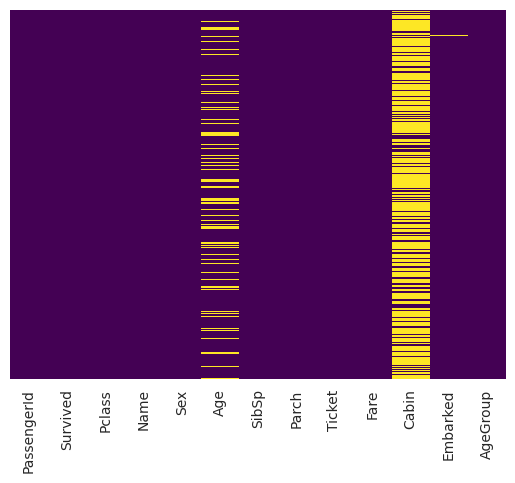

In [ ]:
# heatmap function to create a grid-like visual (like a matrix)
# train.isnull() : Creates a DataFrame of booleans
# yticklabels=False : Removes row labels
# cbar=False : Hides the color bar
# Uses the 'viridis' color palette, which is a gradient from dark purple (low) to yellow (high).
# It highlights missing (True) and present (False) values clearly.
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

/tmp/ipython-input-80-339920161.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=train,palette='RdBu_r')


<Axes: xlabel='Survived', ylabel='count'>

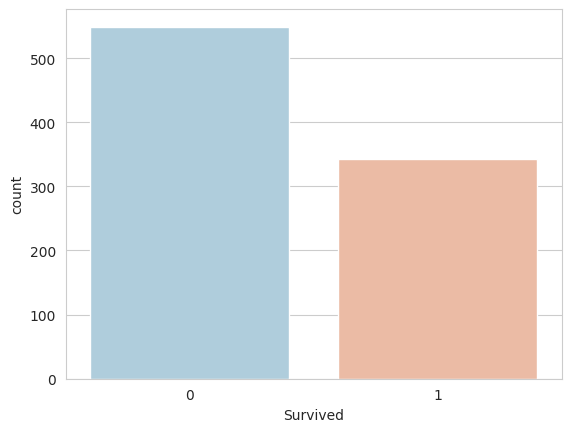

In [ ]:
# countplot is gives us a not survived(0) and survived(1) count
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

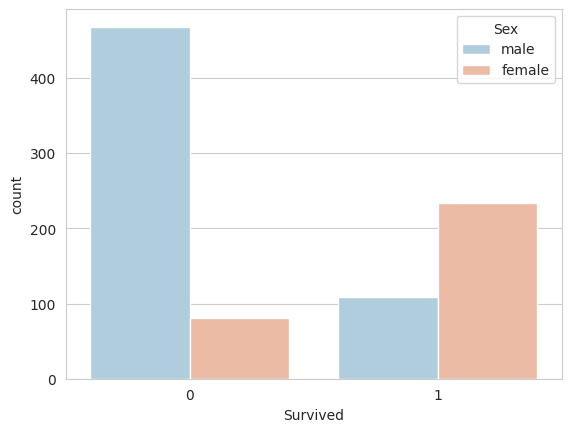

In [ ]:
# hue is Separates the bars by gender, coloring male/female differently.
# Specifies the DataFrame (train) from which to pull the data.
# Chooses a color palette
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

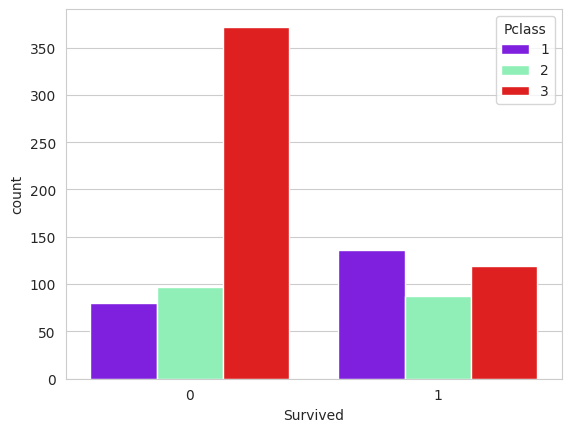

In [ ]:
# creates a bar plot to compare survival across passenger classes (Pclass)
# hue = Pclass' : Adds colored segments in each bar for passenger class (1, 2, 3), helps visualize how class impacted survival
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

/tmp/ipython-input-83-4116248399.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)


<Axes: xlabel='Age'>

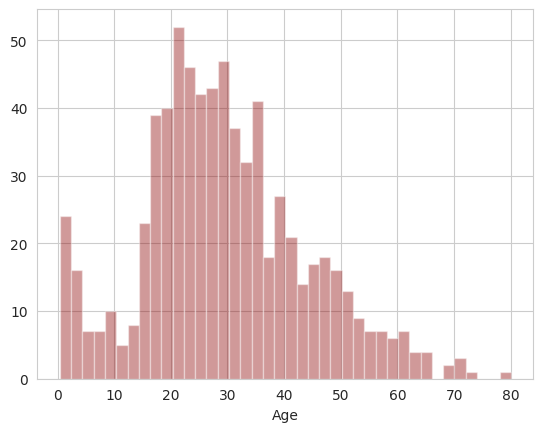

In [ ]:
# used to plot the distribution of the "Age" column
# Deprecated function that creates a histogram
# dropna() : removes all NaN (missing) values
# kde=False : Disables the KDE line (smooth curve); only the histogram bars will be shown
# bins=40 : Divides the age range into 40 bins (intervals)
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

/tmp/ipython-input-84-4190643351.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SibSp',data=train,palette='rainbow')


<Axes: xlabel='SibSp', ylabel='count'>

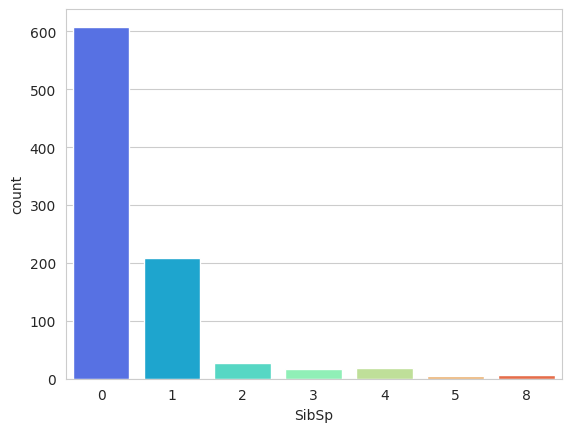

In [ ]:
# It counts the Plots the number of siblings/spouses aboard each passenger had, for eg:0 - Passenger traveled alone, 1 - With 1 sibling or spouse, so on
sns.countplot(x='SibSp',data=train,palette='rainbow')

<Axes: >

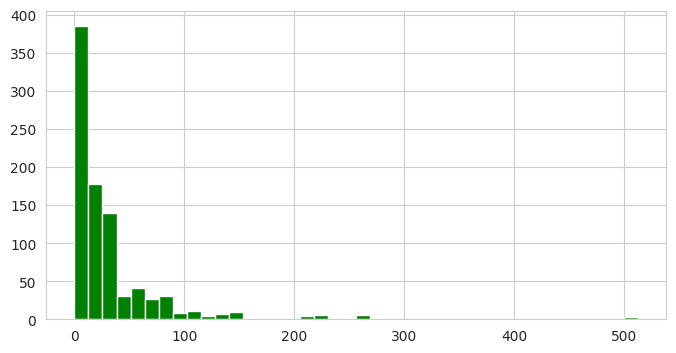

In [ ]:
# The price paid by passangers
train['Fare'].hist(color='green', bins=40, figsize=(8,4))

# Data Cleaning

we want to fill the missing age data of just dropping the missing age data rows. Here we filing in the mean age of all passangers.

/tmp/ipython-input-86-80701983.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

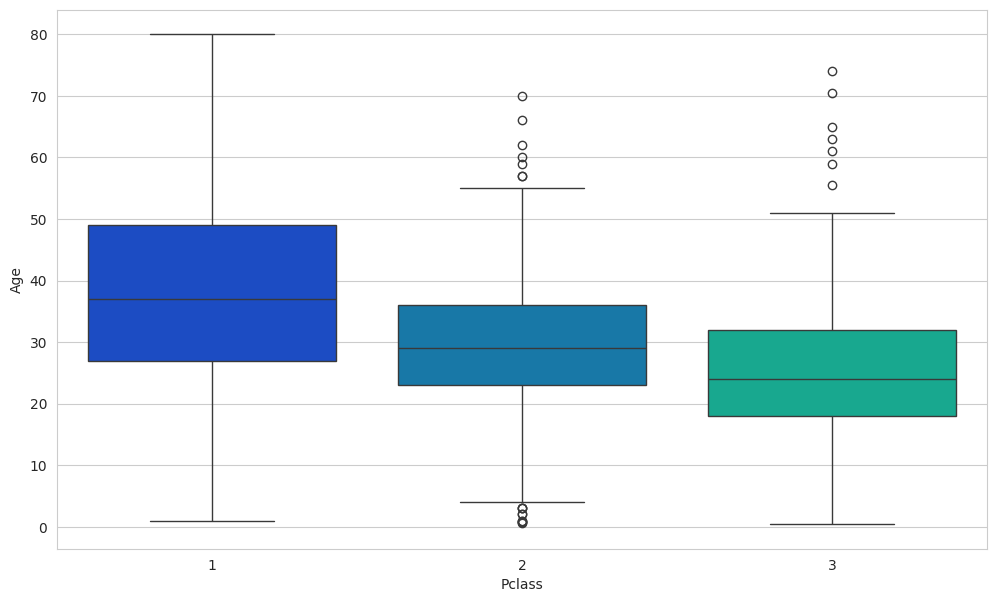

In [ ]:
# we will find average age of class1, class2, class3
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [ ]:
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):
    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29
    else:
      return 24
  else:
    return Age

In [ ]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

/tmp/ipython-input-87-357331086.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/tmp/ipython-input-87-357331086.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

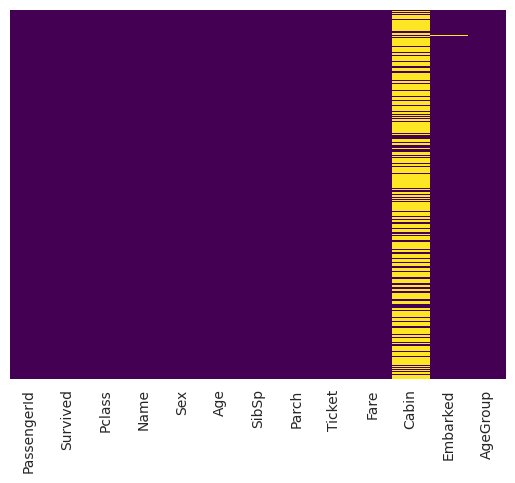

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
train.drop('Cabin', axis=1, inplace=True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult


<Axes: >

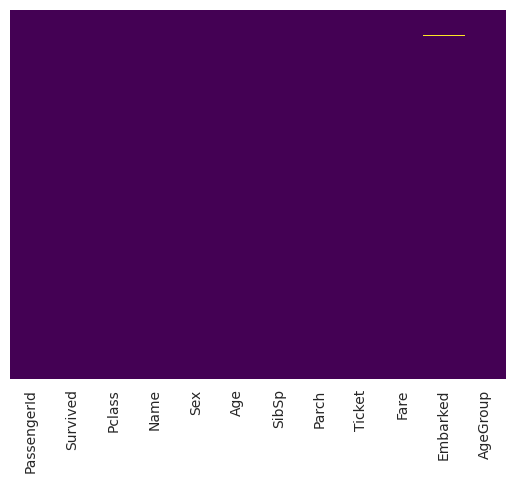

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
train.dropna(inplace=True)

# **Converting Categorical Features**

we need to convert Categorical Features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take those features as input!

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
 11  AgeGroup     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [ ]:
pd.get_dummies(train['Embarked'], drop_first=True).astype(int).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [ ]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [ ]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,AgeGroup
0,1,0,3,22.0,1,0,7.2500,Adult
1,2,1,1,38.0,1,0,71.2833,Adult
2,3,1,3,26.0,0,0,7.9250,Adult
3,4,1,1,35.0,1,0,53.1000,Adult
4,5,0,3,35.0,0,0,8.0500,Adult


In [ ]:
train = pd.concat([train,sex,embark],axis=1)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,AgeGroup,male,Q,S
0,1,0,3,22.0,1,0,7.2500,Adult,True,False,True
1,2,1,1,38.0,1,0,71.2833,Adult,False,False,False
2,3,1,3,26.0,0,0,7.9250,Adult,False,False,True
3,4,1,1,35.0,1,0,53.1000,Adult,False,False,True
4,5,0,3,35.0,0,0,8.0500,Adult,True,False,True


# **Building a Logistic Regression Model**

lets split the data into training & test set

# **Train Test Split**

In [ ]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,AgeGroup,male,Q,S
0,1,3,22.0,1,0,7.2500,Adult,True,False,True
1,2,1,38.0,1,0,71.2833,Adult,False,False,False
2,3,3,26.0,0,0,7.9250,Adult,False,False,True
3,4,1,35.0,1,0,53.1000,Adult,False,False,True
4,5,3,35.0,0,0,8.0500,Adult,True,False,True


In [ ]:
train['Survived'].head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),
                                                    train['Survived'], test_size=0.30,
                                                    random_state=101)


# **Training & Predicting**

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
accuracy = confusion_matrix(y_test, predictions)

In [ ]:
accuracy

array([[151,  12],
       [ 39,  65]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.8089887640449438

In [ ]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])